<a href="https://colab.research.google.com/github/nbchan/INMR96-Digital-Health-and-Data-Analytics/blob/main/Week_07_Tabular_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. What is Pandas and Why Pandas?

* the go-to Python package/library for column-oriented data analysis
* great tool for handling and analyzing tabular data
* many machine learning frameworks support pandas data structures as inputs


For a complete reference to pandas functions, the [*Pandas* documentation](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive info and many tutorials.

---

# 2. Basic Concepts

Similar to how you would import packages in [R](https://www.r-project.org/about.html) using `library()`, the following line **imports** the *pandas* library to your current notebook. This line is usually put in the beginning of your code.

Note that the `as` keyword is used to create an alias for the package.

In [1]:
import pandas as pd

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**: A relational data table with rows and named columns.
  * **`Series`**: A single column that stores a set of data. A `DataFrame` contains one or more `Series`; and a name for each `Series`.

The dataframe is a commonly used abstraction for data manipulation, similar to R.

![pandas-data-structure](https://raw.githubusercontent.com/niuguy/digithealthcourse/master/pics/pandas-data-structure.png)


One way to create a `Series` is to construct a `Series` object. For example:

In [2]:
pd.Series(['Alex', 'Brenda', 'Cindy'])

,0
0,Alex
1,Brenda
2,Cindy


`DataFrame` objects can be created by passing a Python dictionary that maps column names to their respective `Series`. For example:

In [3]:
customer = pd.Series(['Alex', 'Brenda', 'Cindy'])
spendings = pd.Series([100, 300, 250])
country = pd.Series(['UK', 'France', 'Ireland'])

df_customer = pd.DataFrame({'name': customer, 'spendings': spendings, 'country': country})

In [4]:
df_customer

,name,spendings,country
0,Alex,100,UK
1,Brenda,300,France
2,Cindy,250,Ireland


To retrieve a column (as a `Series`) from a `DataFrame`, use square brackets:

In [5]:
df_customer['spendings']

,spendings
0,100
1,300
2,250


To retrieve multiple columns, put a list of column names within the square brackets instead of a string:

In [6]:
df_customer[['name', 'country']]

,name,country
0,Alex,UK
1,Brenda,France
2,Cindy,Ireland


---

# 3. Importing MIMIC-III data from BigQuery as a Pandas `DataFrame`

Most of the time, instead of creating `DataFrame`'s from scratch in Python, you load an entire file as a DataFrame. In our case, we would import MIMIC-III data via BigQuery. There are a few steps to do so.

## 3.1. Provide your credentials to the Colab runtime

Run the following code. You will be given a link that requests permission of the notebook to access your data from BigQuery. Enter that link and accept the request. You might be asked to enter your password in this step.

After that, you will be given a one-time authentication token. Copy and paste it to the textbox under the link. If successful, the message "Authenticated" would be printed.



In [7]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


**Troubleshooting**

If you are unable to authenticate yourself, check for the following:

* Make sure you have followed the [guide to access MIMIC-III on BigQuery](https://mimic.mit.edu/docs/gettingstarted/cloud/bigquery/).
* Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
  * Almost all of your interactions with Google Cloud Platform (GCP) are associated with a project. Importantly, all billing for your usage must be allotted to a single project. In order to use BigQuery you must have an active project associated with your account. BigQuery offers a $300 free trial for first time users. You should not be billed for any reasonable usage for completing the module.
* [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.

## 3.2. Execute your SQL queries and save the results as a `DataFrame`




The best way to do so is to use *cell magic* built in by the `google.cloud.bigquery` library. See the code below but **make two changes** before running the code for yourself.

* Replace `your-project-id-here` with your GCP project ID found in [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager).
* Replace the SQL query with a query of your choice. As a best practice, you should write and test the SQL queries in [BigQuery](https://console.cloud.google.com/bigquery) first, then paste it in Colab.

In [8]:
bigquery_project_id = 'your-project-id-here'
# make sure you change the project ID above!

In [9]:
%%bigquery --project $bigquery_project_id

SELECT * FROM `physionet-data.mimiciii_clinical.admissions`

Query is running:   0%|          |

Downloading:   0%|          |

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,3757,3115,134067,2139-02-13 03:11:00,2139-02-20 07:33:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2139-02-13 00:02:00,2139-02-13 03:22:00,STAB WOUND,0,1
1,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2188-07-10 14:17:00,2188-07-11 01:52:00,PENILE LACERATION-CELLULITIS,0,1
2,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,2133-04-16 19:22:00,2133-04-16 22:17:00,STATUS EPILEPTICUS,0,1
3,11501,9396,106469,2109-02-16 23:14:00,2109-02-23 12:01:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2109-02-16 20:58:00,2109-02-16 23:42:00,SUBDURAL HEMATOMA,0,1
4,11419,9333,133732,2167-10-06 18:35:00,2167-10-16 13:13:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,CORONARY ARTERY DISEASE,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,917,744,148472,2106-07-12 18:52:00,2106-07-16 17:21:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,None,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,NaT,NaT,CORONARY ARTERY DISEASE\ANGIOPLASTY,0,1
58972,44966,56130,114902,2194-09-22 17:07:00,2194-10-08 12:00:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Private,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),UNABLE TO OBTAIN,2194-09-22 14:59:00,2194-09-22 18:26:00,S/P FALL,0,1
58973,53532,82746,156806,2123-09-08 06:45:00,2123-09-24 17:22:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,2123-09-08 03:39:00,2123-09-08 07:55:00,AMS,0,1
58974,12305,10056,100375,2129-05-02 00:12:00,2129-05-06 13:40:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Medicare,None,CHRISTIAN SCIENTIST,UNKNOWN (DEFAULT),WHITE,NaT,NaT,SEPSIS,0,1


Instead of simply printing the query results, you can save it in a Python variable by specifying a variable name after your GCP project ID. The following line saves the `admissions` table to the variable `df`.

If you need to execute multiple SQL queries through BigQuery, make sure to save it as different variables by editing the variable name `df`.

In [10]:
%%bigquery df --project $bigquery_project_id

SELECT * FROM `physionet-data.mimiciii_clinical.admissions`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,3757,3115,134067,2139-02-13 03:11:00,2139-02-20 07:33:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2139-02-13 00:02:00,2139-02-13 03:22:00,STAB WOUND,0,1
1,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2188-07-10 14:17:00,2188-07-11 01:52:00,PENILE LACERATION-CELLULITIS,0,1
2,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,2133-04-16 19:22:00,2133-04-16 22:17:00,STATUS EPILEPTICUS,0,1
3,11501,9396,106469,2109-02-16 23:14:00,2109-02-23 12:01:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2109-02-16 20:58:00,2109-02-16 23:42:00,SUBDURAL HEMATOMA,0,1
4,11419,9333,133732,2167-10-06 18:35:00,2167-10-16 13:13:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,CORONARY ARTERY DISEASE,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,917,744,148472,2106-07-12 18:52:00,2106-07-16 17:21:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,None,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,NaT,NaT,CORONARY ARTERY DISEASE\ANGIOPLASTY,0,1
58972,44966,56130,114902,2194-09-22 17:07:00,2194-10-08 12:00:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Private,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),UNABLE TO OBTAIN,2194-09-22 14:59:00,2194-09-22 18:26:00,S/P FALL,0,1
58973,53532,82746,156806,2123-09-08 06:45:00,2123-09-24 17:22:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,2123-09-08 03:39:00,2123-09-08 07:55:00,AMS,0,1
58974,12305,10056,100375,2129-05-02 00:12:00,2129-05-06 13:40:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Medicare,None,CHRISTIAN SCIENTIST,UNKNOWN (DEFAULT),WHITE,NaT,NaT,SEPSIS,0,1


For some advanced usage such as to incorporate a Python variable in SQL queries, check out the example [here](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=fkhbyGaXKs_6).

---

# 4. Basic Pandas functions

| Name | Description  |
|---|---|
| `DataFrame.columns` | shows a list of column names of a `DataFrame` |
| `DataFrame.describe()` | shows summary statistics about a `DataFrame` for all numerical columns |
| `DataFrame.head()` | displays the first few records of a `DataFrame` |
| `Series.unique()` | shows a list of unique values of a (categorical) column |
| `Series.value_counts()` | counts and tallies the occurrence of each value in a (categorical) column |
| `Series.hist()` | shows the distribution of values in a numerical column |

When in doubt, it is usually useful to refer to [Panda's Documentations](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html).

In [11]:
df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [12]:
df.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,3757,3115,134067,2139-02-13 03:11:00,2139-02-20 07:33:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2139-02-13 00:02:00,2139-02-13 03:22:00,STAB WOUND,0,1
1,8689,7124,109129,2188-07-11 00:58:00,2188-08-01 12:04:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2188-07-10 14:17:00,2188-07-11 01:52:00,PENILE LACERATION-CELLULITIS,0,1
2,12652,10348,121510,2133-04-16 21:12:00,2133-04-23 15:52:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,2133-04-16 19:22:00,2133-04-16 22:17:00,STATUS EPILEPTICUS,0,1
3,11501,9396,106469,2109-02-16 23:14:00,2109-02-23 12:01:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,None,None,WHITE,2109-02-16 20:58:00,2109-02-16 23:42:00,SUBDURAL HEMATOMA,0,1
4,11419,9333,133732,2167-10-06 18:35:00,2167-10-16 13:13:00,NaT,URGENT,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,CORONARY ARTERY DISEASE,0,1


In [13]:
df['ADMISSION_TYPE'].unique()

array(['EMERGENCY', 'URGENT', 'NEWBORN', 'ELECTIVE'], dtype=object)

In [14]:
df['ADMISSION_TYPE'].value_counts()

,count
ADMISSION_TYPE,
EMERGENCY,42071
NEWBORN,7863
ELECTIVE,7706
URGENT,1336


In [15]:
df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,EDREGTIME,EDOUTTIME,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,58976.0,58976.0,58976.0,58976,58976,5854,30877,30877,58976.0,58976.0
mean,29488.5,33755.583288,149970.809584,2151-03-22 15:38:36.768516,2151-04-01 18:51:27.117810,2151-02-03 08:11:13.590708,2151-04-24 10:08:02.123912,2151-04-24 15:52:40.210513,0.099261,0.973006
min,1.0,2.0,100001.0,2100-06-07 19:59:00,2100-06-09 17:09:00,2100-06-19 08:15:00,2100-06-07 13:14:00,2100-06-08 00:06:00,0.0,0.0
25%,14744.75,11993.75,124952.75,2126-02-22 08:30:00,2126-03-04 11:33:30,2125-12-27 18:15:00,2126-04-07 01:58:00,2126-04-07 08:15:00,0.0,1.0
50%,29488.5,24133.5,149989.5,2151-01-15 09:39:00,2151-01-29 16:49:30,2150-09-15 07:08:00,2150-12-12 00:32:00,2150-12-12 03:28:00,0.0,1.0
75%,44232.25,53851.5,174966.5,2176-07-09 02:32:00,2176-07-19 13:30:00,2176-01-29 11:05:00,2176-08-30 03:24:00,2176-08-30 05:39:00,0.0,1.0
max,58976.0,99999.0,199999.0,2210-08-17 17:13:00,2210-08-24 19:43:00,2208-02-05 11:45:00,2210-08-17 10:14:00,2210-08-17 18:25:00,1.0,1.0
std,17025.049075,28092.726225,28883.095213,NaN,NaN,NaN,NaN,NaN,0.299014,0.162067


All variables are either identifiers or categorical variables in the above example.

To showcase the functions for numerical data, let us download a [COVID-19 worldwide dataset](https://github.com/owid/covid-19-data/blob/master/public/data/) with the following code.

In [16]:
df_covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [17]:
df_covid # the results could be different as the data source is constantly being updated

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


For this tutorial, let's filter the dataset and focus on the data of each country on Jan 1, 2021.

In [18]:
df_covid_filtered = df_covid[df_covid['date'] == '2022-01-01'] # filter by date
df_covid_filtered = df_covid_filtered[~df_covid_filtered['iso_code'].str.startswith('OWID_')] # removes non-country locations such as "Worldwide", "Asia" and "Low income"

df_covid_filtered

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
727,AFG,Asia,Afghanistan,2022-01-01,157902.0,0.0,22.429,7352.0,0.0,2.714,...,NaN,37.746,0.50,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4075,ALB,Europe,Albania,2022-01-01,207221.0,0.0,285.286,3187.0,0.0,4.143,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
5749,DZA,Africa,Algeria,2022-01-01,216376.0,0.0,292.286,6229.0,0.0,7.000,...,30.4,83.741,1.90,76.88,0.748,44903228,NaN,NaN,NaN,NaN
7423,ASM,Oceania,American Samoa,2022-01-01,11.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,73.74,NaN,44295,NaN,NaN,NaN,NaN
9097,AND,Europe,Andorra,2022-01-01,21730.0,0.0,168.714,139.0,0.0,0.714,...,37.8,NaN,NaN,83.73,0.868,79843,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418909,VNM,Asia,Vietnam,2022-01-01,1651673.0,0.0,15885.000,31214.0,0.0,235.429,...,45.9,85.847,2.60,75.40,0.704,98186856,NaN,NaN,NaN,NaN
421781,WLF,Oceania,Wallis and Futuna,2022-01-01,453.0,0.0,0.000,7.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
425140,YEM,Asia,Yemen,2022-01-01,10111.0,0.0,2.000,1983.0,0.0,1.000,...,29.2,49.542,0.70,66.12,0.470,33696612,NaN,NaN,NaN,NaN
426814,ZMB,Africa,Zambia,2022-01-01,231581.0,0.0,2301.286,3697.0,0.0,2.714,...,24.7,13.938,2.00,63.89,0.584,20017670,NaN,NaN,NaN,NaN


In [19]:
# (optional) use the seaborn package for better and easier plots
import seaborn as sns
sns.set()

<Axes: >

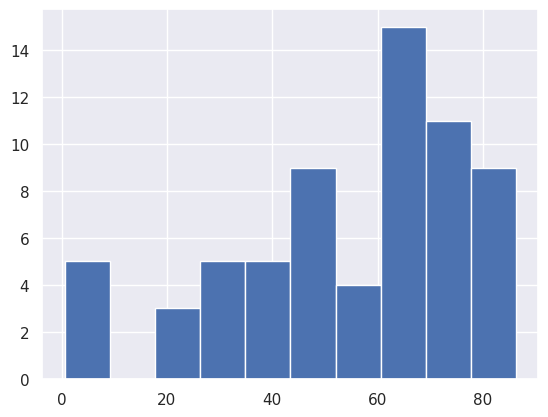

In [20]:
df_covid_filtered['people_fully_vaccinated_per_hundred'].hist()

In [21]:
df_covid_filtered.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.330000e+02,233.0,233.000000,233.000000,233.0,233.000000,233.000000,233.0,233.000000,233.000000,...,145.000000,96.000000,173.000000,234.000000,190.000000,2.380000e+02,0.0,0.0,0.0,0.0
mean,1.203658e+06,0.0,3734.063751,23364.373391,0.0,28.556725,64610.992159,0.0,261.797511,920.262506,...,33.209655,50.456010,3.115480,73.751923,0.721811,3.351605e+07,NaN,NaN,NaN,NaN
std,4.584508e+06,0.0,17475.888104,82690.446192,0.0,129.877645,63600.031900,0.0,444.138218,1064.829969,...,14.128789,32.192499,2.564456,7.422207,0.149633,1.356814e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,NaN,NaN,NaN,NaN
25%,1.271700e+04,0.0,22.429000,126.000000,0.0,0.000000,4212.372000,0.0,5.071000,70.766000,...,22.600000,20.482000,1.300000,69.522500,0.603000,3.786178e+05,NaN,NaN,NaN,NaN
50%,9.235500e+04,0.0,168.714000,1333.000000,0.0,1.143000,52818.023000,0.0,47.695000,547.350000,...,33.100000,48.753000,2.500000,75.070000,0.740000,5.462034e+06,NaN,NaN,NaN,NaN
75%,6.141190e+05,0.0,1037.286000,10184.000000,0.0,9.000000,105706.414000,0.0,320.920000,1467.178000,...,41.500000,82.686750,4.210000,79.812500,0.828750,2.205197e+07,NaN,NaN,NaN,NaN
max,5.187886e+07,0.0,202488.429000,812587.000000,0.0,1571.571000,272572.200000,0.0,2205.111000,6047.838000,...,78.100000,100.000000,13.800000,86.750000,0.957000,1.425887e+09,NaN,NaN,NaN,NaN


---

# 5. Selecting and Filtering Data

In SQL, we use the `WHERE` clause to filter a table.

In Python, the easiest way to filter a `DataFrame` by row is to first generate a `Series` of boolean values, then apply it to the `DataFrame`.

*Example 1:* filter out admission with missing `DEATHTIME` in the MIMIC dataset.

In [22]:
df['DEATHTIME'].notna() # for the opposite criteria, use `.isna()`

,DEATHTIME
0,False
1,False
2,False
3,False
4,False
...,...
58971,False
58972,False
58973,False
58974,False


In [23]:
df[df['DEATHTIME'].notna()] # note that the number of rows dropped from 58976 to 53122

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
70,2734,2261,124642,2119-09-09 08:25:00,2119-09-13 04:35:00,2119-09-13 04:35:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,None,None,None,WHITE,2119-09-08 22:06:00,2119-09-09 09:15:00,ALLERGIC REACTION/LABILE HTN,1,1
71,8729,7157,189452,2137-12-21 12:56:00,2137-12-22 04:20:00,2137-12-22 04:20:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,None,None,UNKNOWN/NOT SPECIFIED,2137-12-21 11:47:00,2137-12-21 12:18:00,S/P FALL,1,1
72,10081,8239,156930,2169-01-26 18:15:00,2169-01-27 02:20:00,2169-01-27 02:20:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,None,None,None,UNKNOWN/NOT SPECIFIED,NaT,NaT,TRAUMA,1,1
73,8297,6825,138726,2181-03-13 20:09:00,2181-03-18 20:03:00,2181-03-18 20:03:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,None,None,None,WHITE,2181-03-13 15:39:00,2181-03-13 18:21:00,ALTERED MENTAL STATUS,1,1
74,14750,11999,144909,2108-08-09 10:35:00,2108-08-11 04:51:00,2108-08-11 04:51:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,None,None,WHITE,2108-08-09 09:21:00,2108-08-09 11:12:00,MULTIPLE GUNSHOT WOUNDS,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58928,55900,90478,170943,2125-07-12 06:03:00,2125-07-14 10:30:00,2125-07-14 10:30:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Self Pay,ENGL,NOT SPECIFIED,UNKNOWN (DEFAULT),UNKNOWN/NOT SPECIFIED,2125-07-12 05:11:00,2125-07-12 07:16:00,INTRACRANIAL HEMORRHAGE;RESPIRTORY FAILURE,1,1
58929,54623,86359,164038,2108-03-23 17:46:00,2108-04-22 00:00:00,2108-04-21 00:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,NOT SPECIFIED,UNKNOWN (DEFAULT),UNKNOWN/NOT SPECIFIED,NaT,NaT,SEIZURES,1,1
58962,33875,27711,135403,2187-10-07 16:11:00,2187-10-15 18:30:00,2187-10-15 18:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,2187-10-07 13:08:00,2187-10-07 18:45:00,HYPOTENSION;SHORTNESS OF BREATH;ACUTE RENAL FA...,1,1
58963,6633,5453,171739,2196-02-12 16:49:00,2196-03-09 20:52:00,2196-03-09 20:52:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicaid,ENGL,PROTESTANT QUAKER,UNKNOWN (DEFAULT),WHITE,2196-02-12 13:22:00,2196-02-12 21:26:00,CONFUSION,1,1


*Example 2:* using `df_covid_filtered`, select countries with more than 1,000 `total_deaths_per_million` and less than 50 `people_vaccinated_per_hundred`.

In [24]:
(df_covid_filtered['total_deaths_per_million'] > 1000) & (df_covid_filtered['people_vaccinated_per_hundred'] < 50)

,0
727,False
4075,False
5749,False
7423,False
9097,False
...,...
418909,False
421781,False
425140,False
426814,False


In [25]:
df_covid_filtered[(df_covid_filtered['total_deaths_per_million'] > 1000) & (df_covid_filtered['people_vaccinated_per_hundred'] < 50)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
44265,BOL,South America,Bolivia,2022-01-01,575247.0,0.0,1801.286,19530.0,0.0,17.429,...,NaN,25.383,1.100,71.51,0.718,12224114,NaN,NaN,NaN,NaN
207767,LBN,Asia,Lebanon,2022-01-01,711259.0,0.0,1685.000,9027.0,0.0,14.714,...,40.7,NaN,2.900,78.93,0.744,5489744,NaN,NaN,NaN,NaN
252795,MNE,Europe,Montenegro,2022-01-01,158010.0,0.0,398.571,2276.0,0.0,2.714,...,47.9,NaN,3.861,76.88,0.829,627082,NaN,NaN,NaN,NaN
341551,SRB,Europe,Serbia,2022-01-01,1289493.0,0.0,1119.143,12568.0,0.0,29.143,...,40.2,97.719,5.609,76.00,0.806,6871547,NaN,NaN,NaN,NaN
356617,ZAF,Africa,South Africa,2022-01-01,3407937.0,0.0,16475.429,90773.0,0.0,61.143,...,33.2,43.993,2.320,64.13,0.709,59893884,NaN,NaN,NaN,NaN
387438,TTO,North America,Trinidad and Tobago,2022-01-01,88944.0,0.0,593.000,2718.0,0.0,22.571,...,NaN,89.443,3.000,73.51,0.796,1531043,NaN,NaN,NaN,NaN


---

# 6. References

* [Getting Started with BigQuery](https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=OHCBQv4uTCPc)
* [Intro to pandas in Colab](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb#scrollTo=rHLcriKWLRe4)
* Hannah Ritchie, Edouard Mathieu, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Esteban Ortiz-Ospina, Joe Hasell, Bobbie Macdonald, Diana Beltekian and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: <https://ourworldindata.org/coronavirus>
[Online Resource]